# Streptomyces albidoflavus Modulome

In [1]:
from pymodulon.core import IcaData
from pymodulon.io import *
from pymodulon.imodulondb import *
from pymodulon.util import *
import pandas as pd
from os import path

In [2]:
ica_data = load_json_model(path.join('../..','data','processed','modulome','salb.json.gz'))

In [3]:
ica_data.imodulon_table['function'] = ica_data.imodulon_table['function'].replace('Unknown', 'Uncharacterized')
ica_data.imodulon_table

,imodulon_size,explained_variance,function
BGC-19-20 deletion,53,0.026971,Genome Modification
Glutamine,26,0.004914,Amino Acid Metabolism
Prophages,20,0.001916,Stress Response
Surugamide repressor,7,0.002046,Secondary Metabolism
ArsR,4,0.002665,Metal Homeostasis
...,...,...,...
Quorum sensing,134,0.003439,Quorum sensing
Serine protease,27,0.004961,Protease
Surugamide,89,0.029237,Secondary Metabolism
Amino acid transport,119,0.003165,Membrane Transport


In [4]:
pd.set_option('display.max_colwidth', None)

table_issues, tf_issues, missing_gene_links, missing_dois = \
    imodulondb_compatibility(ica_data)

print('--Table Issues--')
display(table_issues)
print('--TF Issues--')
display(tf_issues)
print('--Missing Gene Links--')
display(missing_gene_links.values)
print('--Missing DOIs--')
display(missing_dois.values)

--Table Issues--


,Table,Missing Column,Solution
0,iModulonDB,organism,"The default, ""New Organism"", will be used."
1,iModulonDB,dataset,"The default, ""New Dataset"", will be used."
2,iModulonDB,strain,"The default, ""Unspecified"", will be used."
3,iModulonDB,publication_name,"The default, ""Unpublished Study"", will be used."
4,iModulonDB,publication_link,The publication name will not be a hyperlink.
5,iModulonDB,gene_link_db,"The default, ""External Database"", will be used."
6,iModulonDB,organism_folder,"The default, ""new_organism"", will be used."
7,iModulonDB,dataset_folder,"The default, ""new_dataset"", will be used."
8,Gene,regulator,"Regulator info will not display. If you have a TRN, add it to the model to auto-generate this column."
9,Sample,sample,"The sample_table.index will be used. Each entry must be unique. Note that the preferred syntax is ""project__condition__#."""


--TF Issues--


,in_trn,has_link,has_gene


--Missing Gene Links--


array(['XNR_RS30570', 'XNR_RS00005', 'XNR_RS00010', ..., 'XNR_RS29430',
       'XNR_RS30650', 'XNR_RS30655'], dtype=object)

--Missing DOIs--


array(['Control1-MSG', 'Control2-MSG', '27-J1074-RNA-Cryo-MM',
       '28-J1074-RNA-Cryo-MM', '7_Plate_A_MS', '8_Plate_A_MS',
       '10_Plate_B_MS', '9_Plate_B_MS', '11-J1074-RNA-Plate-Filter2A-MS',
       '12-J1074-RNA-Plate-Filter2A-MS', '13-J1074-RNA-Plate-Filter2A-MS',
       '14-J1074-RNA-Plate-Filter2A-MS', '17-J1074-RNA-30min-MM-MSG',
       '18-J1074-RNA-30min-MM-MSG', '358-24hMSG', '359-24hMSG',
       '360-24hMSG', '370-48hMSG', '371-48hMSG', '372-48hMSG',
       '382-72hMSG', '383-72hMSG', '384-72hMSG',
       '15-J1074-RNA-30min-ISP2', '16-J1074-RNA-30min-ISP2',
       '353-24hISP2', '354-24hISP2', '365-48hISP2', '366-48hISP2',
       '5_Arabinose_MM', '6_Arabinose_MM', '29-Asparagine',
       '30-Asparagine', '138-Dcellobiose', '140-Dcellobiose',
       '1_Mannitol_MM', '2_Mannitol_MM', '333-DNPM', '334-DNPM',
       '253-Fructose', '255-Fructose', '155-Glucose', '156-Glucose',
       '650-Glycerol', '651-Glycerol', '149-LAlanine', '150-LAlanine',
       'L-galactose-1', 

## Add the iModulonDB Table

In [56]:
ica_data.imodulondb_table  = {
     'organism': 'Streptomyces albidoflavus',
     'dataset': 'Modulome',
     'strain': 'J1074',
     'publication_name': 'Forthcoming',
     'publication_link': '',
     'gene_link_db': '',
     'organism_folder': 's_albidoflavus',
     'dataset_folder': 'Modulome'
}

## Add the Explained Variance

In [57]:
for k in ica_data.imodulon_table.index:
    ica_data.imodulon_table.loc[k, 'exp_var'] = explained_variance(
        ica_data, imodulons=k)

## Rename some iModulon columns

In [60]:
ica_data.imodulon_table['category'] = ica_data.imodulon_table['function']

In [38]:
# Remove column category
ica_data.imodulon_table = ica_data.imodulon_table.drop(columns=['category'])

KeyError: "['category'] not found in axis"

In [58]:
# Print the updated table
ica_data.imodulon_table

,imodulon_size,explained_variance,function,exp_var
BGC-19-20 deletion,53,0.026971,Genome Modification,0.026971
Glutamine,26,0.004914,Amino Acid Metabolism,0.004914
Prophages,20,0.001916,Stress Response,0.001916
Surugamide repressor,7,0.002046,Secondary Metabolism,0.002046
ArsR,4,0.002665,Metal Homeostasis,0.002665
...,...,...,...,...
Quorum sensing,134,0.003439,Quorum sensing,0.003439
Serine protease,27,0.004961,Protease,0.004961
Surugamide,89,0.029237,Secondary Metabolism,0.029237
Amino acid transport,119,0.003165,Membrane Transport,0.003165


## Links

In [36]:
prefix = 'http://subtiwiki.uni-goettingen.de/v3/gene/search/exact/'

# add gene links
for g in ica_data.gene_table.index:
    ica_data.gene_links[g] = prefix + g



In [ ]:
# add regulator links
for r in tf_issues.index[(tf_issues.has_gene.astype(bool))]:
    ica_data.tf_links[r] = prefix + ica_data.name2num(r)
    
# some regulators don't have genes but do have pages
# here, I link to the direct page since I had to check their existence anyway
other_regs = {
    'SwrA':'http://subtiwiki.uni-goettingen.de/v3/gene/view/5D479874B43F521DB52EDC2C27CDE4967F22DE47',
    'SigK':'http://subtiwiki.uni-goettingen.de/v3/gene/view/24F7FD5C7C3A68BB2760ABB8CBD8FBD65E5FF7D4',
    'YlxR':'http://subtiwiki.uni-goettingen.de/v3/gene/view/F4097349A563503468A2A14F062AEAC532C7917A',
    'LnrK':'http://subtiwiki.uni-goettingen.de/v3/gene/view/387EF370CE24F7A3C20789A57329A02EBED46F53',
    'KipR':'http://subtiwiki.uni-goettingen.de/v3/gene/view/7DA9A79876C546B78B716A64706A3A3716018C2E'
}
for k, v in other_regs.items():
    ica_data.tf_links[k] = v

## Sample Table

In [11]:
# add replicate numbers
for name, group in ica_data.sample_table.groupby(['project', 'condition']):
    ica_data.sample_table.loc[group.index, 'replicate'] = range(1, group.shape[0]+1)
    
# make sample names that include replicate number
ica_data.sample_table = ica_data.sample_table.rename({'full_name':'full_condition_name'}, axis = 1)
ica_data.sample_table['name'] = \
    ica_data.sample_table.full_condition_name + ':' + \
    ica_data.sample_table.replicate.astype(int).astype(str)

# important: adjust naming to this new column
ica_data.sample_table = ica_data.sample_table.rename({
    'Sample': 'SRS_Sample',
    'name': 'sample'
    }, axis = 1)

In [11]:
#ica_data.sample_table.to_csv('bsub_sample_table.csv')

# TODO 
# add a DOI column and then replace the existing sample_table

## Double-check Compatibility

In [61]:
table_issues, tf_issues, missing_gene_links, missing_dois = \
    imodulondb_compatibility(ica_data)

print('--Table Issues--')
display(table_issues)
print('--TF Issues--')
display(tf_issues)
print('--Missing Gene Links--')
display(missing_gene_links.values)
print('--Missing DOIs--')
display(missing_dois.values)

--Table Issues--


,Table,Missing Column,Solution
0,iModulonDB,publication_link,The publication name will not be a hyperlink.
1,Gene,regulator,"Regulator info will not display. If you have a TRN, add it to the model to auto-generate this column."
2,Sample,sample,"The sample_table.index will be used. Each entry must be unique. Note that the preferred syntax is ""project__condition__#."""
3,Sample,n_replicates,This column will be generated for you.
4,Sample,doi,Clicking on activity plot bars will not link to relevant papers for the samples.
5,iModulon,name,imodulon_table.index will be used.
6,iModulon,regulator,The regulator details will be left blank.
7,iModulon,n_genes,This column will be computed for you.
8,iModulon,precision,This column will be left blank.
9,iModulon,recall,This column will be left blank.


--TF Issues--


,in_trn,has_link,has_gene


--Missing Gene Links--


array(['XNR_RS30570', 'XNR_RS00005', 'XNR_RS00010', ..., 'XNR_RS29430',
       'XNR_RS30650', 'XNR_RS30655'], dtype=object)

--Missing DOIs--


array(['Control1-MSG', 'Control2-MSG', '27-J1074-RNA-Cryo-MM',
       '28-J1074-RNA-Cryo-MM', '7_Plate_A_MS', '8_Plate_A_MS',
       '10_Plate_B_MS', '9_Plate_B_MS', '11-J1074-RNA-Plate-Filter2A-MS',
       '12-J1074-RNA-Plate-Filter2A-MS', '13-J1074-RNA-Plate-Filter2A-MS',
       '14-J1074-RNA-Plate-Filter2A-MS', '17-J1074-RNA-30min-MM-MSG',
       '18-J1074-RNA-30min-MM-MSG', '358-24hMSG', '359-24hMSG',
       '360-24hMSG', '370-48hMSG', '371-48hMSG', '372-48hMSG',
       '382-72hMSG', '383-72hMSG', '384-72hMSG',
       '15-J1074-RNA-30min-ISP2', '16-J1074-RNA-30min-ISP2',
       '353-24hISP2', '354-24hISP2', '365-48hISP2', '366-48hISP2',
       '5_Arabinose_MM', '6_Arabinose_MM', '29-Asparagine',
       '30-Asparagine', '138-Dcellobiose', '140-Dcellobiose',
       '1_Mannitol_MM', '2_Mannitol_MM', '333-DNPM', '334-DNPM',
       '253-Fructose', '255-Fructose', '155-Glucose', '156-Glucose',
       '650-Glycerol', '651-Glycerol', '149-LAlanine', '150-LAlanine',
       'L-galactose-1', 

## Save & Export

In [62]:
save_to_json(ica_data, path.join('../..','data','processed','modulome','salb_j1074_imdb.json.gz'))

In [52]:
categories = [
    'Unknown',
    'Secondary Metabolite Biosynthesis',
    'Carbon Metabolism',
    'AA Metabolism',
    'Membrane Transport',
    'Inorganic Ion Transport and Metabolism',
    'Fatty Acid Metabolism',
    'Carbohydrate Transport and Metabolism',
    'Arsenate Resistance and Metabolism',
    'Phosphate Transport and Metabolism',
    'Sulfur Metabolism',
    'Phospholipid Biosynthesis',
    'Phenylacetate Degredation',
    'Nucleoside Metabolism',
    'Transcription',
    'Urea Transport and Metabolism',
    'Energy production and conversion',
    'Stress'
]

In [63]:
pd.set_option('mode.chained_assignment',None)
imodulondb_export(ica_data, '../../../Streptomyces_main/modulytics/')

Writing main site files...
Done writing main site files. Writing plot files...
Two progress bars will appear below. The second will take significantly longer than the first.
Writing iModulon page files (1/2)


  0%|          | 0/78 [00:00<?, ?it/s]

Writing Gene page files (2/2)


  0%|          | 0/5886 [00:00<?, ?it/s]

/Users/nilmat/miniconda3/envs/imodulon/lib/python3.7/site-packages/pymodulon/imodulondb.py:1936: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  .drop("A", 1)


Complete! (Organism = s_albidoflavus; Dataset = Modulome)


  0%|          | 0/23653.0 [00:00<?, ?it/s]

Replicate Pearson R scores:
                            Sample Pair  Pearson R
0    (138-Dcellobiose, 140-Dcellobiose)   0.984600
1          (149-LAlanine, 150-LAlanine)   0.973353
2            (155-Glucose, 156-Glucose)   0.987827
3              (159-Xylose, 160-Xylose)   0.972272
4                (165-ISP22, 167-ISP22)   0.873702
..                                  ...        ...
169      (J1074actrepl1, J1074actrepl3)   0.994922
170      (J1074actrepl2, J1074actrepl3)   0.990917
171            (J1074repl1, J1074repl2)   0.992513
172            (J1074repl1, J1074repl3)   0.815533
173            (J1074repl2, J1074repl3)   0.791242

[174 rows x 2 columns]

Random Pearson R scores:
                           Sample Pair  Pearson R
0      (138-Dcellobiose, 149-LAlanine)   0.710406
1      (138-Dcellobiose, 150-LAlanine)   0.734430
2       (138-Dcellobiose, 155-Glucose)   0.704929
3       (138-Dcellobiose, 156-Glucose)   0.693397
4        (138-Dcellobiose, 159-Xylose)   0.688395
...       

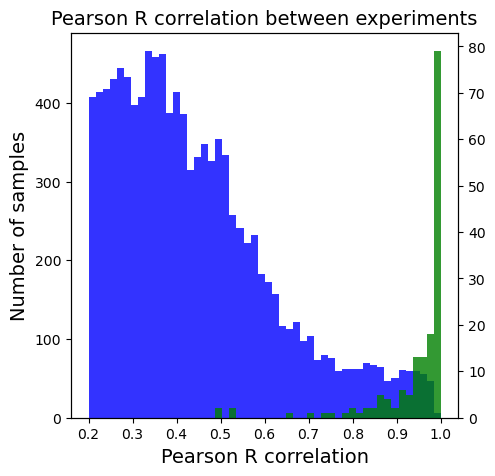

In [22]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Read the metadata file
DF_metadata = pd.read_csv(path.join('../..','data','processed','modulome','metadata.tsv'),index_col=0, sep='\t')

# Calculate the Pearson correlation coefficients between all pairs of samples
rep_corrs = {}
rand_corrs = {}
num_comparisons = len(DF_metadata)*(len(DF_metadata)-1)/2
for exp1, exp2 in tqdm(itertools.combinations(DF_metadata.index, 2), total=num_comparisons):
    if DF_metadata.loc[exp1, 'full_name'] == DF_metadata.loc[exp2, 'full_name']:
        rep_corrs[(exp1, exp2)] = stats.pearsonr(ica_data.A[exp1], ica_data.A[exp2])[0]
    else:
        rand_corrs[(exp1, exp2)] = stats.pearsonr(ica_data.A[exp1], ica_data.A[exp2])[0]

# Convert the results to a Pandas DataFrame
df_rep_corrs = pd.DataFrame(list(rep_corrs.items()), columns=['Sample Pair', 'Pearson R'])
df_rand_corrs = pd.DataFrame(list(rand_corrs.items()), columns=['Sample Pair', 'Pearson R'])

# Print the results
print("Replicate Pearson R scores:")
print(df_rep_corrs)
print("\nRandom Pearson R scores:")
print(df_rand_corrs)

# Plot a histogram of the Pearson correlation coefficients
fig, ax = plt.subplots(figsize=(5, 5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(), bins=50, range=(0.2, 1), alpha=0.8, color='green', linewidth=0)
ax.hist(rand_corrs.values(), bins=50, range=(0.2, 1), alpha=0.8, color='blue', linewidth=0)
ax.set_title('Pearson R correlation between experiments', fontsize=14)
ax.set_xlabel('Pearson R correlation', fontsize=14)
ax.set_ylabel('Number of samples', fontsize=14)

med_corr = np.median(list(rep_corrs.values()))
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

df_rep_corrs.to_csv(path.join('../..','data','processed','modulome','replicate_correlations.tsv'), sep='\t')

In [115]:
# Import the necessary modules
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Define the conditions and replicates
conditions = ica_data.sample_table.full_condition_name.unique()
replicates = {}
for condition in conditions:
    replicates[condition] = ica_data.sample_table[ica_data.sample_table.full_condition_name == condition].index.tolist()

# Calculate the activity differences between replicates for each iModulon
diffs = {}
for iModulon in ica_data.A.index:
    for condition in conditions:
        for replicate1, replicate2 in itertools.combinations(replicates[condition], 2):
            diff = ica_data.A.loc[iModulon, replicate1] - ica_data.A.loc[iModulon, replicate2]
            key = (iModulon, condition, replicate1, replicate2)
            diffs[key] = diff

# Convert the activity differences to a Pandas DataFrame
df_diffs = pd.DataFrame(list(diffs.items()), columns=['Key', 'Activity Difference'])
df_diffs[['iModulon', 'Condition', 'Replicate 1', 'Replicate 2']] = pd.DataFrame(df_diffs['Key'].tolist(), index=df_diffs.index)
df_diffs.drop(columns=['Key'], inplace=True)

# Convert negative numbers to absolute values
df_diffs['Activity Difference'] = df_diffs['Activity Difference'].abs()

# Print the results
df_diffs.to_csv(path.join('../..','data','processed','modulome','activity_differences.tsv'), sep='\t', index=False)


iModulon: Fatty Acid
Condition: azenta:D-cellobiose
Replicates: 138-Dcellobiose, 140-Dcellobiose, Difference: 1.1552689760782253
Condition: azenta:L-Alanine
Replicates: 149-LAlanine, 150-LAlanine, Difference: -0.5789045039123772
Condition: azenta:Glucose
Replicates: 155-Glucose, 156-Glucose, Difference: -1.9465294073599566
Condition: azenta:Xylose
Replicates: 159-Xylose, 160-Xylose, Difference: 0.28794036603099993
Condition: azenta:ISP2 2% NaCl
Replicates: 165-ISP22, 167-ISP22, Difference: -2.910704174260956
Condition: azenta:ISP2 3% NaCl
Replicates: 170-ISP23, 171-ISP23, Difference: -2.7105614307848116
Condition: azenta:MSG 1%NaCl
Replicates: 173-MSG1, 174-MSG1, Difference: -3.1554159812630074
Condition: azenta:MSG 2%NaCl
Replicates: 179-MSG2, 180-MSG2, Difference: -0.06472214034754087
Condition: azenta:MSG 3% NaCl
Replicates: 182-MSG3, 184-MSG3, Difference: 0.6087664514993683
Condition: azenta:Tween 20
Replicates: 205-Tween20, 207-Tween20, Difference: 0.33318836781921135
Condition: a